__Logistic Regression__ is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

## Logistic Regression Assumptions

1. Binary logistic regression requires the dependent variable to be binary.
2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
3. Only the meaningful variables should be included.
4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
5. The independent variables are linearly related to the log odds.
6. Logistic regression requires quite large sample sizes.

Keeping the above assumptions in mind, let’s look at our dataset.

# Data

The dataset comes from an Israeli banking institution, and it is related to its retail loans. The classification goal is to predict whether the loan will default (1/0) (variable y)

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

The dataset provides the bank loans’ information. It includes 21000 records and 10 fields.

In [2]:
data = pd.read_csv("Israeli_Bank_Loans.csv",encoding='ISO-8859-1')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(21000, 10)
['Applicant_ID', 'Age', 'Education_Level', 'Years_with_Current_Employer', 'Years_at_Current_Address', 'Household_Income_(Thousands_NIS)', 'Debt_to_Income_Ratio_(%)', 'Credit_Card_Debt_(Thousands_NIS)', 'Other_Debt_(Thousands_NIS)', 'y']


In [3]:
data.head()

,Applicant_ID,Age,Education_Level,Years_with_Current_Employer,Years_at_Current_Address,Household_Income_(Thousands_NIS),Debt_to_Income_Ratio_(%),Credit_Card_Debt_(Thousands_NIS),Other_Debt_(Thousands_NIS),y
0,1,27,high school,15,10,120,16.5,0,6,0
1,2,34,graduate professional education,13,1,169,5.6,12,5,0
2,3,40,high school,0,4,135,6.9,2,7,0
3,4,28,high school,8,8,210,2.3,11,2,0
4,5,40,university,27,4,83,6.7,0,15,0


#### Input variables

1 - Applicant_ID (numeric)

2 - Age: age of loan applicant (numeric)

3 - Education_Level : type of education (categorical: 'graduate professional education', 'high school', 'university')

4 - Years_with_Current_Employer : number of years with the current employer (numeric)

5 - Years_at_Current_Address : number of years at the current address (numeric)

6 - Household_Income_(Thousands_NIS) (numeric)

7 - Debt_to_Income_Ratio_(%) (numeric)

8 - Credit_Card_Debt_(Thousands_NIS) (numeric)

9 - Other_Debt_(Thousands_NIS)


#### Predict variable (desired target):

y - has the loan defaulted? (binary: '1','0')

The Education_Level column of the dataset has many categories. The Education_Level column has the following categories:

In [4]:
data['Education_Level'].unique()

array(['high school', 'graduate professional education', 'university',
       '0'], dtype=object)

Let us note "high school" as 1, "university" as 2, "graduate professional education" as 3

In [5]:
data.groupby('Education_Level').mean()

,Applicant_ID,Age,Years_with_Current_Employer,Years_at_Current_Address,Household_Income_(Thousands_NIS),Debt_to_Income_Ratio_(%),Credit_Card_Debt_(Thousands_NIS),Other_Debt_(Thousands_NIS),y
Education_Level,,,,,,,,,
0,10836.597531,35.421399,9.118519,8.484774,169.686420,9.073333,5.161317,10.523457,0.085597
graduate professional education,10721.918942,35.110100,8.967490,8.637191,171.866927,8.972042,5.058951,10.365410,0.070655
high school,10385.139945,35.076181,9.091786,8.630925,171.474117,8.853067,4.722376,10.063344,0.034734
university,10582.493974,35.161000,9.062241,8.598489,171.066199,8.894945,4.786832,10.380824,0.057384


After grouping, this is the columns:

# Data exploration

In [6]:
data['y'].value_counts()

0    20000
1     1000
Name: y, dtype: int64

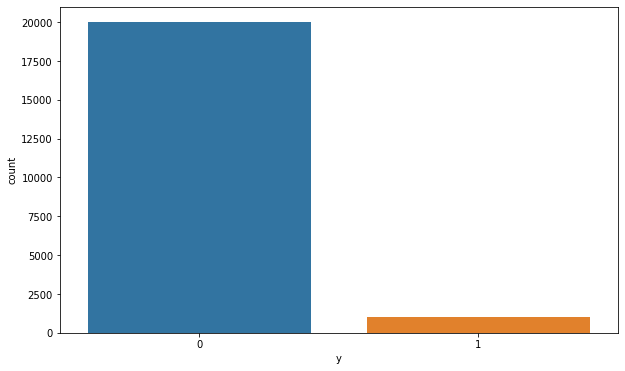

<Figure size 720x432 with 0 Axes>

In [7]:
sns.countplot(x='y', data=data)
plt.show()
plt.savefig('default_count_plot')

In [8]:
count_no_default = len(data[data['y']==0])
count_default = len(data[data['y']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no default is\033[1m", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default\033[1m", pct_of_default*100)

 percentage of no default is 95.23809523809523
 percentage of default 4.761904761904762


Our classes are imbalanced, and the ratio of no-default to default instances is 95:5. Before we go ahead to balance the classes, let’s do some more exploration.

In [9]:
data.groupby('y').mean()

,Applicant_ID,Age,Years_with_Current_Employer,Years_at_Current_Address,Household_Income_(Thousands_NIS),Debt_to_Income_Ratio_(%),Credit_Card_Debt_(Thousands_NIS),Other_Debt_(Thousands_NIS)
y,,,,,,,,
0,10000.5,35.2133,9.25765,8.71115,171.86275,8.62022,4.5515,9.95065
1,20500.5,33.3030,5.35600,6.68300,160.16800,14.28490,9.8080,15.33800


Observations:

1. The average age of loan applicants who defaulted on their loans is younger than that of the loan applicants who didn't.

2. The average years with current employer is lower for loan applicants who defaulted on their loans.

3. The average years with current address is lower for loan applicants who defaulted on their loans.

4. The average household income is lower for loan applicants who defaulted on their loans.

5. The average debt to income ratio is lower for loan applicants who defaulted on their loans.

6. The average credit card debt is higher for loan applicants who defaulted on their loans.

7. The average other debt is higher for loan applicants who defaulted on their loans.

We can calculate categorical means for education level status to get a more detailed sense of our data.

In [10]:
data.groupby('Education_Level').mean()

,Applicant_ID,Age,Years_with_Current_Employer,Years_at_Current_Address,Household_Income_(Thousands_NIS),Debt_to_Income_Ratio_(%),Credit_Card_Debt_(Thousands_NIS),Other_Debt_(Thousands_NIS),y
Education_Level,,,,,,,,,
0,10836.597531,35.421399,9.118519,8.484774,169.686420,9.073333,5.161317,10.523457,0.085597
graduate professional education,10721.918942,35.110100,8.967490,8.637191,171.866927,8.972042,5.058951,10.365410,0.070655
high school,10385.139945,35.076181,9.091786,8.630925,171.474117,8.853067,4.722376,10.063344,0.034734
university,10582.493974,35.161000,9.062241,8.598489,171.066199,8.894945,4.786832,10.380824,0.057384


## Create dummy variables

That is variables with only two values, zero and one.

In [11]:
cat_vars=['Education_Level']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Education_Level']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

Our final data columns will be:

In [12]:
data_final=data[to_keep]
data_final.columns.values

array(['Applicant_ID', 'Age', 'Years_with_Current_Employer',
       'Years_at_Current_Address', 'Household_Income_(Thousands_NIS)',
       'Debt_to_Income_Ratio_(%)', 'Credit_Card_Debt_(Thousands_NIS)',
       'Other_Debt_(Thousands_NIS)', 'y', 'Education_Level_0',
       'Education_Level_graduate professional education',
       'Education_Level_high school', 'Education_Level_university'],
      dtype=object)

In [13]:
data_final.drop(['Applicant_ID'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Over-sampling using SMOTE

With our training data created, I’ll up-sample the no-subscription using the __SMOTE algorithm__ (Synthetic Minority Oversampling Technique). At a high level, SMOTE:

1. Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.

2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.

In [14]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("\033[1m length of oversampled data is" ,len(os_data_X))
print("\033[1m Number of no default in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("\033[1m Number of default",len(os_data_y[os_data_y['y']==1]))
print("\033[1m Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("\033[1m Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

 length of oversampled data is 28008
 Number of no default in oversampled data 14004
 Number of default 14004
 Proportion of no default data in oversampled data is  0.5
 Proportion of default data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Recursive Feature Elimination

__Recursive Feature Elimination (RFE)__ is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [15]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The RFE has helped us select the following features: 'Age', 'Years_with_Current_Employer', 'Years_at_Current_Address','Household_Income_(Thousands_NIS)', 'Debt_to_Income_Ratio_(%)','Credit_Card_Debt_(Thousands_NIS)', 'Other_Debt_(Thousands_NIS)','Education_Level_graduate professional education','Education_Level_high school', 'Education_Level_university'.

In [16]:
cols=['Age', 'Years_with_Current_Employer', 'Years_at_Current_Address','Household_Income_(Thousands_NIS)',
      'Debt_to_Income_Ratio_(%)','Credit_Card_Debt_(Thousands_NIS)', 'Other_Debt_(Thousands_NIS)',
      'Education_Level_graduate professional education','Education_Level_high school', 'Education_Level_university'] 
X=os_data_X[cols]
y=os_data_y['y']

# Implementing the model

In [17]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.343699
         Iterations 7
                                         Results: Logit
Model:                         Logit                      Pseudo R-squared:           0.504     
Dependent Variable:            y                          AIC:                        19272.6637
Date:                          2020-06-04 23:51           BIC:                        19355.0662
No. Observations:              28008                      Log-Likelihood:             -9626.3   
Df Model:                      9                          LL-Null:                    -19414.   
Df Residuals:                  27998                      LLR p-value:                0.0000    
Converged:                     1.0000                     Scale:                      1.0000    
No. Iterations:                7.0000                                                           
------------------------------------------------------------------

# Gradient Boosting Classifier Model Fitting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Predicting the test set results and calculating the accuracy

In [19]:
y_pred = gb.predict(X_test)
print("\033[1m Accuracy of Gradient Boosting Classifier Model on test set:", '{:.2f}'.format(gb.score(X_test, y_test)))

 Accuracy of Gradient Boosting Classifier Model on test set: 0.90


# Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3739  411]
 [ 403 3850]]


In [21]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  7589 correct predictions
 The result is telling us that we have:  814 incorrect predictions
 We have a total predictions of:  8403


# Compute precision, recall, F-measure and support

To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4150
           1       0.90      0.91      0.90      4253

    accuracy                           0.90      8403
   macro avg       0.90      0.90      0.90      8403
weighted avg       0.90      0.90      0.90      8403



In [23]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of Gradient Boosting Classifier Model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Gradient Boosting Classifier Model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient\nBoosting Classifier Model predicted a loan is going to default, that loan actually defaulted","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Gradient Boosting Classifier Model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a loan who defaulted the company present in the test set, our Gradient Boosting Classifier\nModel can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Gradient Boosting Classifier Model: 90.31%
Well, you got a classification rate of 90.31%

Precision of Gradient Boosting Classifier Model: 90.35%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient
Boosting Classifier Model predicted a loan is going to default, that loan actually defaulted 90.35% of
 the time.

Recall of Gradient Boosting Classifier Model: 90.52%
Recall: If there is a loan who defaulted the company present in the test set, our Gradient Boosting Classifier
Model can identify it 90.52% of the time.


# ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

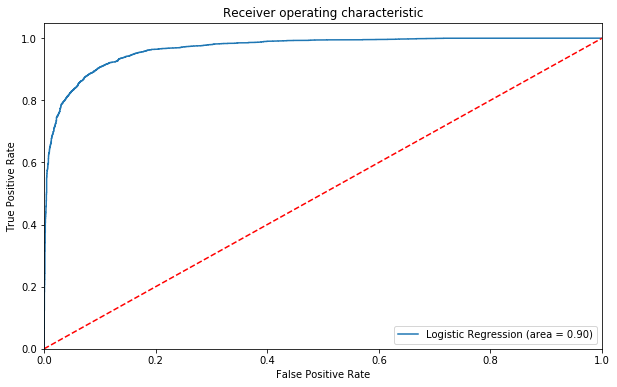

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Real-time Prediction

Finally, the best way to use this model is assigning Default Probability for each applicant, create segments, and build strategies on top of that. To get the default probability from our model, utilize the code block below:

In [25]:
data['PD'] = gb.predict_proba(data[X_train.columns])[:,1]
data[['Applicant_ID','PD']].head(10)

,Applicant_ID,PD
0,1,0.031506
1,2,0.112481
2,3,0.186568
3,4,0.018039
4,5,0.067139
5,6,0.045385
6,7,0.011375
7,8,0.015984
8,9,0.681827
9,10,0.556019


In [26]:
data.to_csv('PD.csv', encoding='utf-8')